In [327]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


# stock

In [328]:
CSI300 = pd.read_csv('data/CSI300.csv')
CSI300

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2019,"4,096.58","4,077.75","4,098.14","4,069.01",123.26K,0.37%
1,12/30/2019,"4,081.63","4,015.52","4,083.69","4,001.50",155.97K,1.48%
2,12/27/2019,"4,022.03","4,029.25","4,066.80","4,019.72",150.93K,-0.10%
3,12/26/2019,"4,025.99","3,993.67","4,025.99","3,993.54",108.86K,0.88%
4,12/25/2019,"3,990.87","3,988.66","4,000.56","3,976.36",94.94K,-0.05%
...,...,...,...,...,...,...,...
482,01/08/2018,"4,160.16","4,140.85","4,166.32","4,127.31",173.88K,0.52%
483,01/05/2018,"4,138.75","4,133.34","4,151.28","4,123.28",149.01K,0.24%
484,01/04/2018,"4,128.81","4,114.12","4,137.64","4,105.89",134.54K,0.42%
485,01/03/2018,"4,111.39","4,091.46","4,140.05","4,088.73",151.85K,0.59%


In [329]:
# Convert date
CSI300['Date'] = pd.to_datetime(CSI300['Date'], format='%m/%d/%Y')

# Clean % change (remove % and convert to float)
CSI300['ChangePct'] = CSI300['Change %'].str.replace('%', '').astype(float) / 100

CSI300 = CSI300.drop(columns = ["Open", "High", "Low", "Change %", "Vol."])

In [330]:
CSI300.to_csv("data_cleaned/CSI300.csv")

In [331]:
SP500 = pd.read_csv('data/S&P500.csv')
SP500

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2019,"3,230.80","3,215.20","3,231.70","3,212.00",NaN,0.29%
1,12/30/2019,"3,221.30","3,240.10","3,240.90","3,216.60",NaN,-0.58%
2,12/27/2019,"3,240.00","3,247.20","3,247.90","3,234.40",NaN,0.00%
3,12/26/2019,"3,239.90","3,227.20","3,240.10","3,227.20",NaN,0.51%
4,12/24/2019,"3,223.40","3,225.40","3,226.40","3,220.50",NaN,-0.02%
...,...,...,...,...,...,...,...
498,01/08/2018,"2,747.70","2,742.70","2,748.50","2,737.60",NaN,0.16%
499,01/05/2018,"2,743.20","2,731.30","2,743.40","2,727.90",NaN,0.70%
500,01/04/2018,"2,724.00","2,719.30","2,729.30","2,719.10",NaN,0.40%
501,01/03/2018,"2,713.10","2,697.80","2,714.40","2,697.80",NaN,0.64%


In [332]:
# Convert date
SP500['Date'] = pd.to_datetime(SP500['Date'], format='%m/%d/%Y')

# Clean % change (remove % and convert to float)
SP500['ChangePct'] = SP500['Change %'].str.replace('%', '').astype(float) / 100

SP500 = SP500.drop(columns = ["Open", "High", "Low", "Change %", "Vol."])
SP500

,Date,Price,ChangePct
0,2019-12-31,"3,230.80",0.0029
1,2019-12-30,"3,221.30",-0.0058
2,2019-12-27,"3,240.00",0.0000
3,2019-12-26,"3,239.90",0.0051
4,2019-12-24,"3,223.40",-0.0002
...,...,...,...
498,2018-01-08,"2,747.70",0.0016
499,2018-01-05,"2,743.20",0.0070
500,2018-01-04,"2,724.00",0.0040
501,2018-01-03,"2,713.10",0.0064


In [333]:
SP500.to_csv("data_cleaned/SP500.csv")

# US news

In [334]:
cnbc_df = pd.read_csv('data/cnbc_2018_2019.csv')
cnbc_df

,Headlines,Time,Description
0,Cramer shares the best way to get your child e...,"6:51 PM ET Tue, 31 Dec 2019",Jim Cramer spells out the importance of gettin...
1,Cramer makes the case for including bonds in y...,"6:28 PM ET Tue, 31 Dec 2019",Jim Cramer addresses the lingering question of...
2,Cramer explains the magic of compounding,"6:28 PM ET Tue, 31 Dec 2019",Jim Cramer explains why young investors stand ...
3,"Cramer Remix: Here's where your first $10,000 ...","7:01 PM ET Tue, 31 Dec 2019",Jim Cramer shares his advice for how investors...
4,Cramer Remix: Here's how to approach Fed-induc...,"7:11 PM ET Mon, 30 Dec 2019",Jim Cramer breaks down which stocks are worth ...
...,...,...,...
2439,Cramer shares his top energy stock picks as oi...,"7:22 PM ET Tue, 2 Jan 2018",Jim Cramer revisited the oil sector and hand-p...
2440,Cramer's lightning round: Buy Becton Dickinson...,"7:07 PM ET Tue, 2 Jan 2018",Jim Cramer rattled off his take on callers' fa...
2441,Cramer's S&P 500 and Dow charts indicate a str...,"7:21 PM ET Tue, 2 Jan 2018",Jim Cramer warned investors about getting too ...
2442,Cramer reflects on how Trump's actions are fue...,"7:20 PM ET Tue, 2 Jan 2018",Jim Cramer examined the notion that investors ...


In [335]:
# Convert the Time column to datetime
cnbc_df['Time'] = cnbc_df['Time'].str.strip().str.replace(r'\s+', ' ', regex=True)

cnbc_df['Time'] = pd.to_datetime(cnbc_df['Time'], format='%I:%M %p ET %a, %d %b %Y')
cnbc_df['Date'] = cnbc_df['Time'].dt.date

cnbc_df

,Headlines,Time,Description,Date
0,Cramer shares the best way to get your child e...,2019-12-31 18:51:00,Jim Cramer spells out the importance of gettin...,2019-12-31
1,Cramer makes the case for including bonds in y...,2019-12-31 18:28:00,Jim Cramer addresses the lingering question of...,2019-12-31
2,Cramer explains the magic of compounding,2019-12-31 18:28:00,Jim Cramer explains why young investors stand ...,2019-12-31
3,"Cramer Remix: Here's where your first $10,000 ...",2019-12-31 19:01:00,Jim Cramer shares his advice for how investors...,2019-12-31
4,Cramer Remix: Here's how to approach Fed-induc...,2019-12-30 19:11:00,Jim Cramer breaks down which stocks are worth ...,2019-12-30
...,...,...,...,...
2439,Cramer shares his top energy stock picks as oi...,2018-01-02 19:22:00,Jim Cramer revisited the oil sector and hand-p...,2018-01-02
2440,Cramer's lightning round: Buy Becton Dickinson...,2018-01-02 19:07:00,Jim Cramer rattled off his take on callers' fa...,2018-01-02
2441,Cramer's S&P 500 and Dow charts indicate a str...,2018-01-02 19:21:00,Jim Cramer warned investors about getting too ...,2018-01-02
2442,Cramer reflects on how Trump's actions are fue...,2018-01-02 19:20:00,Jim Cramer examined the notion that investors ...,2018-01-02


In [336]:
cnbc_df = cnbc_df.drop(columns=["Time", "Description"])
cnbc_df

,Headlines,Date
0,Cramer shares the best way to get your child e...,2019-12-31
1,Cramer makes the case for including bonds in y...,2019-12-31
2,Cramer explains the magic of compounding,2019-12-31
3,"Cramer Remix: Here's where your first $10,000 ...",2019-12-31
4,Cramer Remix: Here's how to approach Fed-induc...,2019-12-30
...,...,...
2439,Cramer shares his top energy stock picks as oi...,2018-01-02
2440,Cramer's lightning round: Buy Becton Dickinson...,2018-01-02
2441,Cramer's S&P 500 and Dow charts indicate a str...,2018-01-02
2442,Cramer reflects on how Trump's actions are fue...,2018-01-02


In [337]:
cnbc_df.to_csv("data_cleaned/cnbc.csv")

In [338]:
benzinga_df = pd.read_csv("data/benzinga_2018_2019.csv")
benzinga_df

,Num,title,date,stock
0,702025,Shanxi Securities Signs Agreement With Company...,2018-01-01 08:24:00-05:00,JD
1,847963,Macau's Gaming Inspection and Coordination Bur...,2018-01-01 08:30:00-05:00,MPEL
2,847962,UPDATE: Macau December 2017 Gaming Revenue +14...,2018-01-01 08:32:00-05:00,MPEL
3,466197,North Korean Leader Kim Jong Un Mentions Possi...,2018-01-01 09:59:00-05:00,EWY
4,134879,"Benzinga's Bulls & Bears: Apple, GE, Starbucks...",2018-01-01 16:11:00-05:00,BAC
...,...,...,...,...
222108,897482,10 Best Performing S&P 500 Stocks Of The Decade,2019-12-31 15:01:00-05:00,NFLX
222109,215200,Cardtronics Option Alert: Jun 19 $50 Calls at ...,2019-12-31 15:17:00-05:00,CATM
222110,585648,"Drugmakers Including Pfizer, GlaxoSmithKline, ...",2019-12-31 15:56:00-05:00,GSK
222111,1000470,"Drugmakers Including Pfizer, GlaxoSmithKline, ...",2019-12-31 15:56:00-05:00,PFE


In [339]:
benzinga_df = benzinga_df.drop(columns=["Num", "stock"])
benzinga_df['Date'] = pd.to_datetime(benzinga_df['date'], utc=True)
benzinga_df = benzinga_df.drop(columns=["date"])
benzinga_df = benzinga_df.rename(columns={'title': 'Headlines'})
benzinga_df


,Headlines,Date
0,Shanxi Securities Signs Agreement With Company...,2018-01-01 13:24:00+00:00
1,Macau's Gaming Inspection and Coordination Bur...,2018-01-01 13:30:00+00:00
2,UPDATE: Macau December 2017 Gaming Revenue +14...,2018-01-01 13:32:00+00:00
3,North Korean Leader Kim Jong Un Mentions Possi...,2018-01-01 14:59:00+00:00
4,"Benzinga's Bulls & Bears: Apple, GE, Starbucks...",2018-01-01 21:11:00+00:00
...,...,...
222108,10 Best Performing S&P 500 Stocks Of The Decade,2019-12-31 20:01:00+00:00
222109,Cardtronics Option Alert: Jun 19 $50 Calls at ...,2019-12-31 20:17:00+00:00
222110,"Drugmakers Including Pfizer, GlaxoSmithKline, ...",2019-12-31 20:56:00+00:00
222111,"Drugmakers Including Pfizer, GlaxoSmithKline, ...",2019-12-31 20:56:00+00:00


In [340]:
benzinga_df.to_csv("data_cleaned/benzinga.csv")

In [341]:
guardian_df = pd.read_csv("data/guardian_2018_2019.csv")
guardian_df

,Time,Headlines
0,2019-12-31,Donald Trump says he will sign first phase of ...
1,2019-12-31,Bank's summer party bill edges higher despite ...
2,2019-12-31,Ghosn 'hid in musical instrument case' during ...
3,2019-12-31,Universal Music sells €3bn stake to Chinese co...
4,2019-12-31,UK minimum wage to rise by four times rate of ...
...,...,...
13475,2018-01-02,Members’ club backed by Lord Ashcroft seeks to...
13476,2018-01-02,The Guardian's share tips for 2018
13477,2018-01-02,Tributes paid after five Britons killed in sea...
13478,2018-01-02,Vehicles are now America's biggest CO2 source ...


In [342]:
guardian_df['Date'] = pd.to_datetime(guardian_df['Time']).dt.date
guardian_df = guardian_df.drop(columns=["Time"])
guardian_df

,Headlines,Date
0,Donald Trump says he will sign first phase of ...,2019-12-31
1,Bank's summer party bill edges higher despite ...,2019-12-31
2,Ghosn 'hid in musical instrument case' during ...,2019-12-31
3,Universal Music sells €3bn stake to Chinese co...,2019-12-31
4,UK minimum wage to rise by four times rate of ...,2019-12-31
...,...,...
13475,Members’ club backed by Lord Ashcroft seeks to...,2018-01-02
13476,The Guardian's share tips for 2018,2018-01-02
13477,Tributes paid after five Britons killed in sea...,2018-01-02
13478,Vehicles are now America's biggest CO2 source ...,2018-01-02


In [343]:
guardian_df.to_csv("data_cleaned/guardian.csv")

In [344]:
reuter_df = pd.read_csv("data/reuters_2018_2019.csv")
reuter_df

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [345]:
reuter_df['Date'] = pd.to_datetime(reuter_df['Time'], format='%b %d %Y').dt.date
reuter_df = reuter_df.drop(columns=["Time", "Description"])
reuter_df

,Headlines,Date
0,TikTok considers London and other locations fo...,2020-07-18
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18
2,Trail of missing Wirecard executive leads to B...,2020-07-18
3,Twitter says attackers downloaded data from up...,2020-07-18
4,U.S. Republicans seek liability protections as...,2020-07-17
...,...,...
32765,Malaysia says never hired British data firm at...,2018-03-20
32766,Prosecutors search Volkswagen headquarters in ...,2018-03-20
32767,McDonald's sets greenhouse gas reduction targets,2018-03-20
32768,Pratt & Whitney to deliver spare A320neo engin...,2018-03-20


In [346]:
reuter_df.to_csv("data_cleaned/reuter.csv")

In [347]:
merged_df = pd.concat([cnbc_df, guardian_df, reuter_df], ignore_index=True)
merged_df = merged_df.sort_values(by='Date')
merged_df = merged_df.dropna(subset=['Headlines', 'Date'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')
merged_df = merged_df[merged_df['Date'].dt.year.isin([2018, 2019])]
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date
merged_df = merged_df.drop_duplicates(subset=['Headlines'])
merged_df = merged_df.reset_index(drop=True)
merged_df.to_csv("data_cleaned/us_news.csv", encoding='utf-8-sig')

# CN news

In [348]:
sina = pd.read_csv("data/新浪财经2018-2019.csv")
sina = sina.drop(columns = ["微博id", "头条文章url", "原始图片url", "微博视频url", "发布位置", "发布工具", "点赞数", "转发数", "评论数"])
sina = sina.rename(columns={'微博正文': 'weibo', '发布时间': 'time'})
sina['time'] = pd.to_datetime(sina['time']).dt.date
sina

,weibo,time
0,【回望银行业2019丨聚光灯下的比拼：理财子公司元年大幕开启】2019年“自带流量”的理财子...,2019-12-31
1,【罗振宇：以前我们同情北大杀猪学生 现在人家年入过亿】罗振宇2019-2020#时间的朋友#...,2019-12-31
2,#回力童鞋含有致儿童性早熟成分#【一批次回力童鞋不合格 含有可致“儿童性早熟”成分】近日，国...,2019-12-31
3,【#全球前500富豪今年共挣1.2万亿美元#】彭博社报道称，全球最富有的500人在2019年...,2019-12-31
4,【#今年全球数码相机出货量或锐减两成# 仅有10年前八分之一】12月30日，据金融界报道，日...,2019-12-31
...,...,...
1239,【美国公务员排长队领免费食物度日 特朗普和国会议员却被曝正常领薪】1月16日，美国华盛顿的联...,2019-01-19
1240,【华林公司涉传销被查，电疗法曾陷电死人纠纷】在保健市场上，权健“火疗”与华林“电疗”的知名度...,2019-01-19
1241,【真香！偶遇盖茨街头排队买汉堡】1月13日，盖茨街头排队买汉堡被偶遇。汉堡一直是盖茨的最爱，...,2019-01-19
1242,【无限极内部推销话术：拉家常，讲故事，反复强调产品好】近日，无限极产品被曝疑致三岁女童心肌损...,2019-01-19


In [349]:
tonghuashun = pd.read_csv("data/同花顺2018-2019.csv")
tonghuashun = tonghuashun.drop(columns = ["微博id", "头条文章url", "原始图片url", "微博视频url", "发布位置", "发布工具", "点赞数", "转发数", "评论数"])
tonghuashun = tonghuashun.rename(columns={'微博正文': 'weibo', '发布时间': 'time'})
tonghuashun['time'] = pd.to_datetime(tonghuashun['time']).dt.date
tonghuashun

,weibo,time
0,跨年夜送福利了，2020年投资日历来了，祝各位投资者在2020年投资顺利，心想事成 [组图...,2019-12-31
1,2019年你的战绩如何？#一张照片告别2019# (来自@同花顺) [组图共2张] 原图,2019-12-31
2,电子行业周报：DRAM涨价先于预期，大基金完成入股精测电子 原图,2019-12-31
3,辛苦一年的你 快来领取股民考试成绩单 原图,2019-12-31
4,2019年最后一张龙虎榜复盘 原图,2019-12-31
...,...,...
1162,【蔚来汽车：所谓“销量作假”及“大幅裁员”纯属捏造】3月22日上午消息，针对大幅裁员以及员工...,2019-03-22
1163,【午评：创业板指跌近2% 工业大麻板块再度逆势走强】三大股指早盘持续下挫，创业板指跌逾2%，...,2019-03-22
1164,【科创板IPO企业名单将今日预披露】 3月18日，上交所上线了科创板股票发行上市...,2019-03-22
1165,【监管通知突然被关注？为常态监管 明确4类异常交易】 一份3月初下发的对股票交易监测要点的...,2019-03-21


In [350]:
dongfang = pd.read_csv("data/东方财富.csv")
dongfang = dongfang.drop(columns = ["微博id", "头条文章url", "原始图片url", "微博视频url", "发布位置", "发布工具", "点赞数", "转发数", "评论数"])
dongfang = dongfang.rename(columns={'微博正文': 'weibo', '发布时间': 'time'})
dongfang['time'] = pd.to_datetime(dongfang['time']).dt.date
dongfang


,weibo,time
0,【与你息息相关！2020年1月新规来了 今后这些钱省下了】新年的钟声就要敲响，为我们带来法治...,2019-12-31
1,【复盘2019！32张图看懂A股牛在哪】2019年的A股可谓否极泰来，深证成指涨幅高居全球第...,2019-12-31
2,【又是商誉惹的祸！逾250亿市值“营养品巨头”拟计提15亿 公司刚刚这样回应】12月31日晚...,2019-12-31
3,【深交所：2019年深市股票成交金额73万亿元 同比增长46.13%】深交所发布2019年深...,2019-12-31
4,【这不是玩笑 A股市场包揽今年全球主要市场指数涨幅冠亚军！有图有真相】随着大金融板块的一波发...,2019-12-31
...,...,...
4769,【2018年基金展望：公募弱冠重构江湖 私募借势探路国际】2018年是贯彻党的十九大精神的开...,2018-01-01
4770,【销量狂跌55.3% 江淮SUV为何上演滑铁卢】2017年即将过去，这一年，对江淮汽车来说，...,2018-01-01
4771,【2017年基金排名新鲜出炉 价值投资者尽享“王者盛宴”】随着2017年最后一个交易日结束，...,2018-01-01
4772,【全年PMI增长平稳 中国经济换挡进入新阶段】近日，国家统计局服务业调查中心和中国物流与采购...,2018-01-01


In [351]:
guoxin = pd.read_csv("data/国资小新.csv")
guoxin = guoxin.drop(columns=[
    "微博id", "头条文章url", "原始图片url", "微博视频url",
    "发布位置", "发布工具", "点赞数", "转发数", "评论数"
])
guoxin = guoxin.rename(columns={'微博正文': 'weibo', '发布时间': 'time'})
guoxin['time'] = pd.to_datetime(guoxin['time'], errors='coerce').dt.date
guoxin


,weibo,time
0,#晚安新语# #许愿博# 2020年马上要来了，你的新年愿望是什么？来评论区打卡互送祝福吧，...,2019-12-31
1,【豪华客滚船内部长啥样？原来还有健身房！】12月30日，@中国船舶 所属广船国际建造的全球首...,2019-12-31
2,【你以为京张高铁只是车速快？其实它“冲浪”速度更快！】#全国首条5G高铁诞生#2019年12...,2019-12-31
3,#早安新语## 央企日历# 【2016年12月31日 纳米比亚湖山铀矿生产出第一桶铀】201...,2019-12-31
4,#早安新语## 央企日历# 【2002年12月31日 世界首条商业运营的磁悬浮交通线开通运营...,2019-12-31
...,...,...
2866,【无人驾驶地铁强势来袭，小新等你约！】近日，由中国铁道建筑有限公司所属中铁十二局电气化公司@...,2018-01-08
2867,【3000万元资助额度！虽然这个基金的名字很长，但是真的很厉害！】近日，社会安全风险感知与防...,2018-01-08
2868,#微招聘# 【毕业去哪儿|中国节能2018年校园招聘开启！】中国节能环保集团有限公司是中央企...,2018-01-08
2869,【#央企人事调整# 465 】国家电力投资集团公司召开中层以上管理人员大会。中共中央组织部副...,2018-01-03


In [352]:
yanghang = pd.read_csv("data/央行微播.csv")
yanghang = yanghang.drop(columns=[
    "微博id", "头条文章url", "原始图片url", "微博视频url",
    "发布位置", "发布工具", "点赞数", "转发数", "评论数"
])
yanghang = yanghang.rename(columns={'微博正文': 'weibo', '发布时间': 'time'})
yanghang['time'] = pd.to_datetime(yanghang['time'], errors='coerce').dt.date
yanghang

,weibo,time
0,【人民银行行长易纲看望慰问外汇储备经营管理人员】网页链接,2019-12-31
1,【中国人民银行行长易纲新年致辞】 原图,2019-12-31
2,【中国人民银行公告〔2019〕第24号】为健全债券违约处置机制，保护投资人合法权益，根据《全...,2019-12-31
3,【人民银行有关负责人就存量浮动利率贷款定价基准转换答记者问】网页链接,2019-12-28
4,【人民银行发布关于存量浮动利率贷款定价基准转换的公告】网页链接,2019-12-28
...,...,...
655,【周小川出席国际清算银行会议】2018年1月7日至8日，国际清算银行（BIS）在瑞士巴塞尔召...,2018-01-09
656,【中泰两国央行续签双边本币互换协议】近期，中国人民银行与泰国中央银行续签了中泰双边本币互换协...,2018-01-08
657,【关于规范债券市场参与者债券交易业务的通知答记者问】针对债券市场存在的一些不规范交易行为，人...,2018-01-05
658,【进一步完善人民币跨境业务政策促进贸易投资便利化】人民银行发布《关于进一步完善人民币跨境业务...,2018-01-05


In [353]:
cn_sup = pd.read_csv("data/cn_supplement_news.csv")
cn_sup['time'] = pd.to_datetime(cn_sup['time'], errors='coerce').dt.date
cn_sup = cn_sup.dropna(subset=['time', 'weibo'])
cn_sup

,weibo,time
0,5月起，一批重磅新规将正式实施！沪港通、深港通额度将扩大四倍增值税税率调整抗癌药等28项进口...,2018-05-01
1,4月份中国制造业采购经理指数（PMI）为51.4，连续八个月保持在54%以上，比上月下降0....,2018-05-01
2,10:44 招商宏观张一平点评2018年4月中国制造业PMI：制造业PMI保持平稳，关注中小...,2018-05-01
3,海南省政协副主席、科技厅厅长史贻云说，海南将按照“陆海空”总体布局，推进三亚深海科技城、深海...,2018-05-01
4,中财办副主任杨伟民谈贸易争端：不必怕，外需占比已不到10%。,2018-05-01
...,...,...
1675,委内瑞拉油长：当前原油产量为157万桶/日；目标是维持油市平衡和稳定；计划提高对印度的原油销量。,2019-02-12
1676,阿联酋能源部长马兹鲁伊：目前阿联酋石油产量为307万桶/日；欧佩克＋1月石油减产执行很到位；...,2019-02-12
1677,阿联酋阿布扎比国家石油公司ADNOC：印度能源需求将在未来10年增加10倍；印度在我们的战略...,2019-02-12
1679,国债期货强势走高，尾盘涨幅稍有回落，10年期主力合约涨0.31%，5年期主力合约涨0.19%...,2019-02-12


In [354]:
cn_merged_df = pd.concat([sina, tonghuashun, dongfang, guoxin, yanghang, cn_sup], ignore_index=True)
cn_merged_df = cn_merged_df.sort_values(by='time')
cn_merged_df = cn_merged_df.drop_duplicates(subset=['weibo'])
cn_merged_df = cn_merged_df.rename(columns={'weibo':'Headlines'})
cn_merged_df = cn_merged_df.reset_index(drop=True)
cn_merged_df

,Headlines,time
0,【价值投资者的胜利 看看但斌、蒋锦志和邱国鹭这一年的感悟】蓝筹股估值修复的过程已基本完成，但...,2018-01-01
1,【四部委：新能源车免征购置税延至2020年】12月27日，财政部等四部委发布公告称，财政部、...,2018-01-01
2,【全年PMI增长平稳 中国经济换挡进入新阶段】近日，国家统计局服务业调查中心和中国物流与采购...,2018-01-01
3,【2017年基金排名新鲜出炉 价值投资者尽享“王者盛宴”】随着2017年最后一个交易日结束，...,2018-01-01
4,【销量狂跌55.3% 江淮SUV为何上演滑铁卢】2017年即将过去，这一年，对江淮汽车来说，...,2018-01-01
...,...,...
12133,【港府：#IMF肯定香港国际金融中心地位#】据香港特区政府新闻网30日报道，国际货币基金组织...,2019-12-31
12134,【#研究太极拳治糖尿病#，福建中医药大学副校长获880万经费】福建中医药大学官网12月27日...,2019-12-31
12135,【#业主购买万科商品房后发现不让住# 万科回应：没规定办公楼里不能住人】据广东佛山业主爆料，...,2019-12-31
12136,【回望银行业2019丨聚光灯下的比拼：理财子公司元年大幕开启】2019年“自带流量”的理财子...,2019-12-31


In [355]:
cn_merged_df.to_csv("data_cleaned/china_news.csv", encoding='utf-8-sig')


# Filter News

In [356]:
us_news_raw = merged_df
cn_news_raw = cn_merged_df

In [357]:
us_news_raw

,Headlines,Date
0,Members’ club backed by Lord Ashcroft seeks to...,2018-01-02
1,Co-op launches £160m expansion plan for 2018,2018-01-02
2,The Guardian's share tips for 2018,2018-01-02
3,Tributes paid after five Britons killed in sea...,2018-01-02
4,Vehicles are now America's biggest CO2 source ...,2018-01-02
...,...,...
39064,"Ghosn says in Lebanon, having 'escaped injustice'",2019-12-31
39065,French government minister 'very surprised' by...,2019-12-31
39066,White House adviser says China trade deal sign...,2019-12-31
39067,"Uber, Postmates sue to block California gig wo...",2019-12-31


In [358]:
cn_news_raw

,Headlines,time
0,【价值投资者的胜利 看看但斌、蒋锦志和邱国鹭这一年的感悟】蓝筹股估值修复的过程已基本完成，但...,2018-01-01
1,【四部委：新能源车免征购置税延至2020年】12月27日，财政部等四部委发布公告称，财政部、...,2018-01-01
2,【全年PMI增长平稳 中国经济换挡进入新阶段】近日，国家统计局服务业调查中心和中国物流与采购...,2018-01-01
3,【2017年基金排名新鲜出炉 价值投资者尽享“王者盛宴”】随着2017年最后一个交易日结束，...,2018-01-01
4,【销量狂跌55.3% 江淮SUV为何上演滑铁卢】2017年即将过去，这一年，对江淮汽车来说，...,2018-01-01
...,...,...
12133,【港府：#IMF肯定香港国际金融中心地位#】据香港特区政府新闻网30日报道，国际货币基金组织...,2019-12-31
12134,【#研究太极拳治糖尿病#，福建中医药大学副校长获880万经费】福建中医药大学官网12月27日...,2019-12-31
12135,【#业主购买万科商品房后发现不让住# 万科回应：没规定办公楼里不能住人】据广东佛山业主爆料，...,2019-12-31
12136,【回望银行业2019丨聚光灯下的比拼：理财子公司元年大幕开启】2019年“自带流量”的理财子...,2019-12-31


In [359]:
# Define filtering keywords
keep_keywords = [
    'inflation', 'interest rate', 'unemployment', 'CPI', 'PPI', 'GDP',
    'Federal Reserve', 'tariff', 'trade war', 'stock market',
    'S&P 500', 'CSI 300', 'macro', 'index', 'economic outlook',
    'monetary policy', 'fiscal policy', 'recession', 'oil', 'dollar',
    'bond yield', 'Brexit', 'China', 'Trump', 'PMI', 'ISM',
    'federal funds rate', 'balance sheet', 'labor market', 'jobless claims',
    'nonfarm payrolls', 'economic growth', 'consumer spending', 'retail sales',
    'housing starts', 'new home sales', 'existing home sales', 'building permits',
    'durable goods', 'factory orders', 'trade deficit', 'budget deficit', 'interest payment',
    'yield curve', 'debt ceiling', 'government shutdown', 'banking sector',
    'financial stability', 'market volatility', 'economic slowdown', 'credit market', 'EU', 'Europe'
]

drop_keywords = [
    'Cramer', "cramer", "jefferies", "wedbush", "cowen", "piperjaffray", "benchmark maintains",
"analyst rating", "reiterates", "raises price target", "names top pick", "price cut", "pets", "gift card", "package holiday", "street photography", "celebrity",
"potato", "fashion", "beauty", "lifestyle", "trending", "music", "gaming"
]

# Apply filtering
keep_mask = us_news_raw['Headlines'].str.contains('|'.join(keep_keywords), case=False, na=False)
drop_mask = us_news_raw['Headlines'].str.contains('|'.join(drop_keywords), case=False, na=False)
final_mask = keep_mask & ~drop_mask

# Final relevant headlines
filtered_df = us_news_raw[final_mask]

# Output how many would be left
remaining_count = len(filtered_df)
remaining_count

10609

In [360]:
n_filtered = remaining_count
date_range = pd.date_range(start='2019-01-01', periods=730, freq='D')
simulated_dates = np.random.choice(date_range, size=n_filtered)

# Group by month and count
filtered_df['month'] = pd.to_datetime(filtered_df['Date'], errors='coerce').dt.to_period('M')
date_distribution = filtered_df.groupby('month').size().reset_index(name='count')


/var/folders/t5/m480qyfn2vnbgmm98d9vyd2m0000gn/T/ipykernel_323/1915216212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = pd.to_datetime(filtered_df['Date'], errors='coerce').dt.to_period('M')


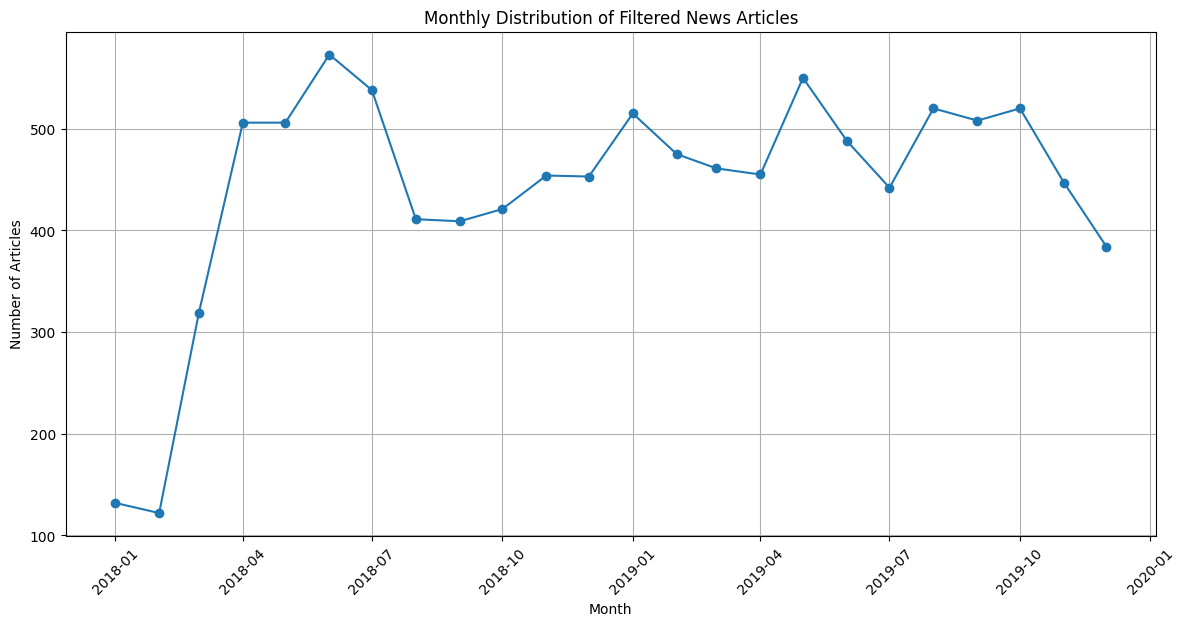

In [361]:
# Convert period to datetime for plotting
date_distribution['month'] = date_distribution['month'].dt.to_timestamp()

# Plot the date distribution
plt.figure(figsize=(12, 6))
plt.plot(date_distribution['month'], date_distribution['count'], marker='o')
plt.title('Monthly Distribution of Filtered News Articles')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [362]:
# Define a list of Chinese economic/finance-related keywords
keep_keywords = [
    '通胀', '利率', '失业率', 'CPI', 'PPI', 'GDP',
    '美联储', '关税', '贸易战', '股市', '上证指数', '沪深300',
    '宏观', '经济展望', '货币政策', '财政政策', '经济衰退',
    '原油', '美元', '债券收益率', '特朗普', 'PMI', '制造业指数',
    '出口', '进口', '消费', '投资', '房地产', '房价', '楼市',
    '工业增加值', '社会融资', '金融监管', '影子银行',
    '中美关系', '汇率', '人民币', '降准', '加息', '降息',
    '央行', '货币供应量', '信贷', '社会消费品零售总额',
    '财政赤字', '预算', '居民收入', '就业', '企业利润', '制造业',
    '出口退税', '关税清单', '外资', '外汇储备', 'PBOC', '央票'
]

# Filter rows where content contains any of the keywords
filtered_china_df = cn_news_raw[cn_news_raw['Headlines'].str.contains('|'.join(keep_keywords), case=False, na=False)]

# Convert date column
filtered_china_df['time'] = pd.to_datetime(filtered_china_df['time'], errors='coerce')

# Group by month
filtered_china_df['month'] = filtered_china_df['time'].dt.to_period('M')
date_distribution = filtered_china_df.groupby('month').size().reset_index(name='count')


/var/folders/t5/m480qyfn2vnbgmm98d9vyd2m0000gn/T/ipykernel_323/1454454507.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_china_df['time'] = pd.to_datetime(filtered_china_df['time'], errors='coerce')
/var/folders/t5/m480qyfn2vnbgmm98d9vyd2m0000gn/T/ipykernel_323/1454454507.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_china_df['month'] = filtered_china_df['time'].dt.to_period('M')


In [363]:
filtered_china_df

,Headlines,time,month
0,【价值投资者的胜利 看看但斌、蒋锦志和邱国鹭这一年的感悟】蓝筹股估值修复的过程已基本完成，但...,2018-01-01,2018-01
2,【全年PMI增长平稳 中国经济换挡进入新阶段】近日，国家统计局服务业调查中心和中国物流与采购...,2018-01-01,2018-01
3,【2017年基金排名新鲜出炉 价值投资者尽享“王者盛宴”】随着2017年最后一个交易日结束，...,2018-01-01,2018-01
5,【2018年基金展望：公募弱冠重构江湖 私募借势探路国际】2018年是贯彻党的十九大精神的开...,2018-01-01,2018-01
8,【贺宛男：2017年腰斩股没有“屈死鬼”】统计显示，不计上市不足一年的次新股(436只)，两...,2018-01-01,2018-01
...,...,...,...
12110,【江南春：主流人群消费升级集中在精神、知识、健康、智能化消费4大领域】分众传媒董事局主席@江...,2019-12-31,2019-12
12115,【最新调查：#90后超六成压力来自房和车#】12月30日发布的《90后理财与消费报告》显示，...,2019-12-31,2019-12
12124,【北向资金连续30日净流入 科技和医药股是今年两条增持主线】2019年是外资快速涌入A股市场...,2019-12-31,2019-12
12125,【2019中国经济：增速稳韧性强 区域发展战略齐头并进】岁末收官，中国经济呈上了一份高质量的...,2019-12-31,2019-12


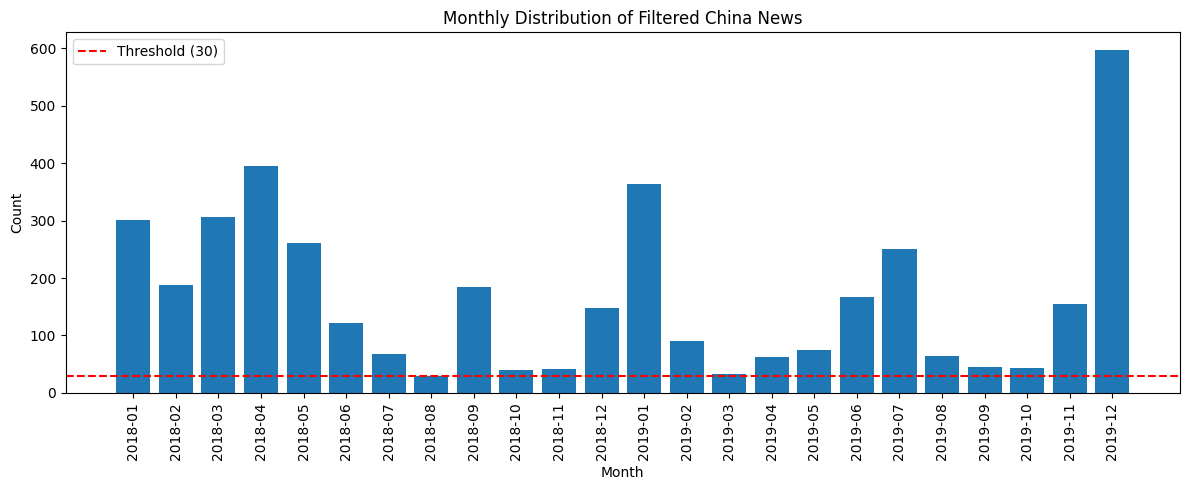

In [364]:
plt.figure(figsize=(12, 5))
plt.bar(date_distribution['month'].astype(str), date_distribution['count'])
plt.axhline(30, color='red', linestyle='--', label='Threshold (30)')
plt.xticks(rotation=90)
plt.title("Monthly Distribution of Filtered China News")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [365]:
filtered_china_df = filtered_china_df.drop(columns=['month'])
filtered_china_df = filtered_china_df.reset_index(drop=True)
filtered_china_df.to_csv('data_final/cn_news.csv', encoding='utf-8-sig')

In [ ]:
filtered_df = filtered_df.drop(columns=['month'])
np.random.seed(42)
filtered_df = filtered_df.sample(n=4000, random_state=42)
filtered_df = filtered_df.sort_values(by='Date')
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.to_csv('data_final/us_news.csv')

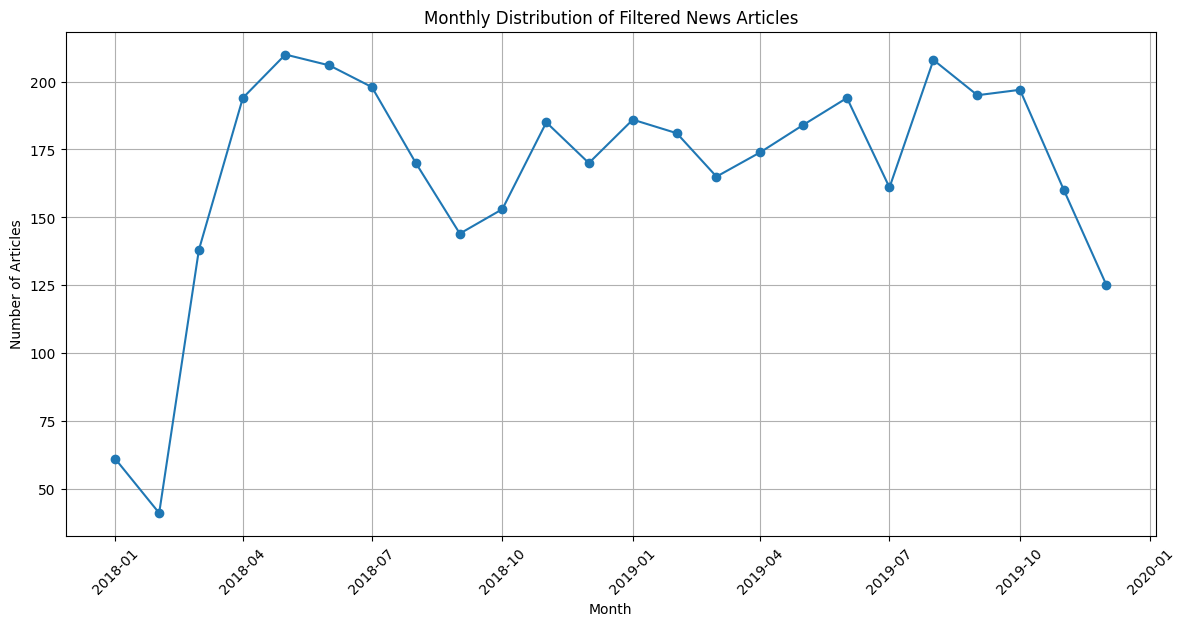

In [370]:
# Group by month and count
filtered_df['month'] = pd.to_datetime(filtered_df['Date'], errors='coerce').dt.to_period('M')
date_distribution = filtered_df.groupby('month').size().reset_index(name='count')

# Convert period to datetime for plotting
date_distribution['month'] = date_distribution['month'].dt.to_timestamp()

# Plot the date distribution
plt.figure(figsize=(12, 6))
plt.plot(date_distribution['month'], date_distribution['count'], marker='o')
plt.title('Monthly Distribution of Filtered News Articles')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()